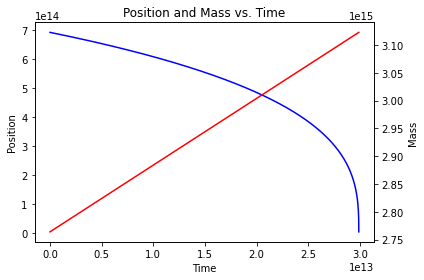

29891700000000
0.1299639130434783


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Newtonian acceleration
def acl(M, r, softening):
    
    return -M/(r**2 + softening);

#Derivative of energy density from Friedmann's equations
def f(rho):
    
    return -3*(8*math.pi/3)**(1/2)*(rho)**(3/2);

#Derivative of the scale factor from Friedmann's equations
def g(a, rho):
    
    return (8*math.pi*rho/3)**(1/2)*a;
    
def main():
    
    #Creating variables for constants and some variables
    m = 10**(6);
    a = 10**(5);
    softening = 10**2;

    rho = 10**(-3)*a**(-3)*m**(-2);

    R = 10**(3/2)*(8*math.pi/3)**(-1/2)*a**(3/2);
    R = R*2*m;

    M = (8*math.pi/3)*R**(3)*rho;

    x = R;
    v = 0;
    acc = acl(M, x, softening);
    
    t = 0;
    dt = 5*10**7;
    
    #Arrays to store values of x, t, and M
    arrayx = [x];
    arrayt = [t];
    arrayM = [M];
    
    while (x > 0):
        
        #Leapfrog Integration
        x += v*dt + 0.5*acc*dt**(2);
        v = 0.5*acc*dt**(2);
        
        #RK4 to advance rho and a
        h = dt;
        k1 = f(rho);
        k2 = f(rho + h*k1/2);
        k3 = f(rho + h*k2/2);
        k4 = f(rho + h*k3);
        
        rho += h/6 * (k1 + 2*k2 + 2*k3 + k4);
        
        l1 = g(a, rho);
        l2 = g(a + h*l1/2, rho);
        l3 = g(a + h*l2/2, rho);
        l4 = g(a + h*l3, rho);
        
        a += h/6 * (l1 + 2*l2 + 2*l3 + l4);
        
        R = 10**(3/2)*(8*math.pi/3)**(-1/2)*a**(3/2);
        R = R*2*m;
        M = (8*math.pi/3)*R**(3)*rho;
        
        #Completion of Leapfrog Integration
        acc = acl(M, x, softening);
        v = 0.5*acc*dt**(2);
        
        t += dt;
        
        if (x > 0):
            
            arrayx.append(x);
            arrayt.append(t);
            arrayM.append(M);
    
    #Plotting x vs. t and M vs. t
    fig, ax1 = plt.subplots()
    
    ax1.plot(arrayt, arrayx, c='blue');
    ax1.set_xlabel("Time");
    ax1.set_ylabel("Position");

    ax2 = ax1.twinx();
    ax2.plot(arrayt, arrayM, c='red');
    ax2.set_ylabel("Mass");
    
#     plt.legend(loc="upper left");
    plt.title("Position and Mass vs. Time");
    fig.tight_layout();
    plt.show();
    
    return t;

if __name__== "__main__":
    
    t = main();
    print(t);
    print(t/(2.3*10**(14)));